In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import itertools

In [2]:
# Image parameters
IMG_SIZE = (96, 96)
BATCH_SIZE = 32


In [3]:
# Load dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\nisal\Downloads\IoT\ClassificationModel\dataset\tra",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\nisal\Downloads\IoT\ClassificationModel\dataset\val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)

Found 775 files belonging to 2 classes.
Found 775 files belonging to 2 classes.


In [4]:
# Normalize
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [5]:
# Prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
# Build tiny CNN model
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(96, 96, 3)),
    layers.Conv2D(8, 3, activation='relu'),     # fewer filters
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),        # smaller dense layer
    layers.Dense(1, activation='sigmoid')       # binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train model
history = model.fit(train_ds, validation_data=val_ds, epochs=25)

Epoch 1/25
25/25 [==============================] - 3s 84ms/step - loss: 0.6927 - accuracy: 0.5445 - val_loss: 0.6884 - val_accuracy: 0.5445
Epoch 2/25
25/25 [==============================] - 1s 50ms/step - loss: 0.6877 - accuracy: 0.5445 - val_loss: 0.6815 - val_accuracy: 0.5445
Epoch 3/25
25/25 [==============================] - 1s 51ms/step - loss: 0.6762 - accuracy: 0.5445 - val_loss: 0.6657 - val_accuracy: 0.5445
Epoch 4/25
25/25 [==============================] - 1s 49ms/step - loss: 0.6493 - accuracy: 0.6039 - val_loss: 0.6218 - val_accuracy: 0.7626
Epoch 5/25
25/25 [==============================] - 1s 49ms/step - loss: 0.5916 - accuracy: 0.7097 - val_loss: 0.5545 - val_accuracy: 0.7677
Epoch 6/25
25/25 [==============================] - 1s 50ms/step - loss: 0.5553 - accuracy: 0.7548 - val_loss: 0.5364 - val_accuracy: 0.7781
Epoch 7/25
25/25 [==============================] - 1s 49ms/step - loss: 0.5379 - accuracy: 0.7613 - val_loss: 0.5289 - val_accuracy: 0.7845
Epoch 8/25
25

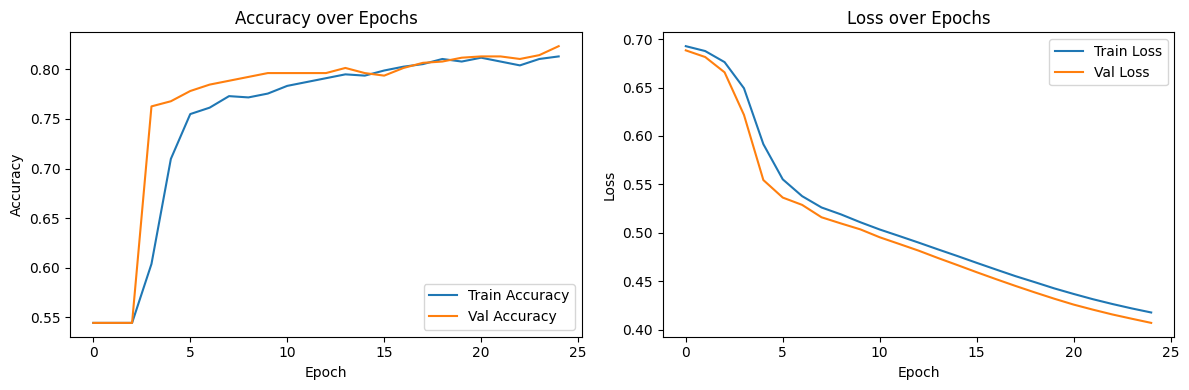

In [8]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Collect predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.round(preds).flatten())

1/1 [==============================] - 0s 74ms/step


In [10]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Not Train', 'Train']))


Classification Report:
              precision    recall  f1-score   support

   Not Train       0.85      0.82      0.84       422
       Train       0.80      0.82      0.81       353

    accuracy                           0.82       775
   macro avg       0.82      0.82      0.82       775
weighted avg       0.82      0.82      0.82       775



In [11]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['Not Train', 'Train']

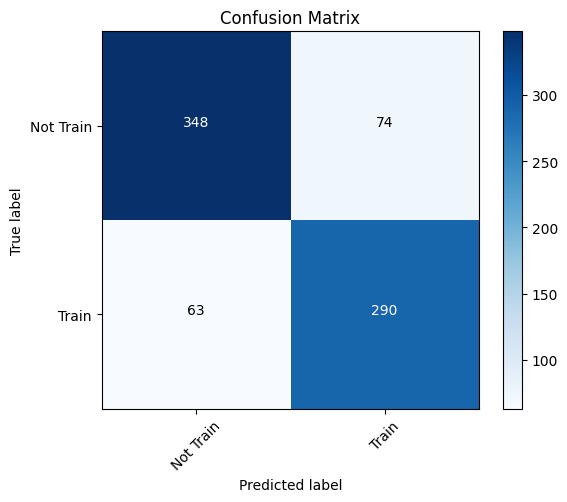

In [12]:
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(cm, labels)
plt.show()

In [13]:
model.save(r"C:\Users\nisal\Downloads\IoT\ClassificationModel\train_classifier_model")

INFO:tensorflow:Assets written to: C:\Users\nisal\Downloads\IoT\ClassificationModel\train_classifier_model\assets


INFO:tensorflow:Assets written to: C:\Users\nisal\Downloads\IoT\ClassificationModel\train_classifier_model\assets
